In [1]:
import pandas as pd

try:
    df_iris = pd.read_csv('Iris.csv')
    display(df_iris.head())
except FileNotFoundError:
    print("Error: 'Iris.csv' not found.")
    df_iris = None

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Shape of the DataFrame: (150, 6)

Data Types:
 Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

Target variable: Species

Missing Values:
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Target Variable Distribution:
 Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


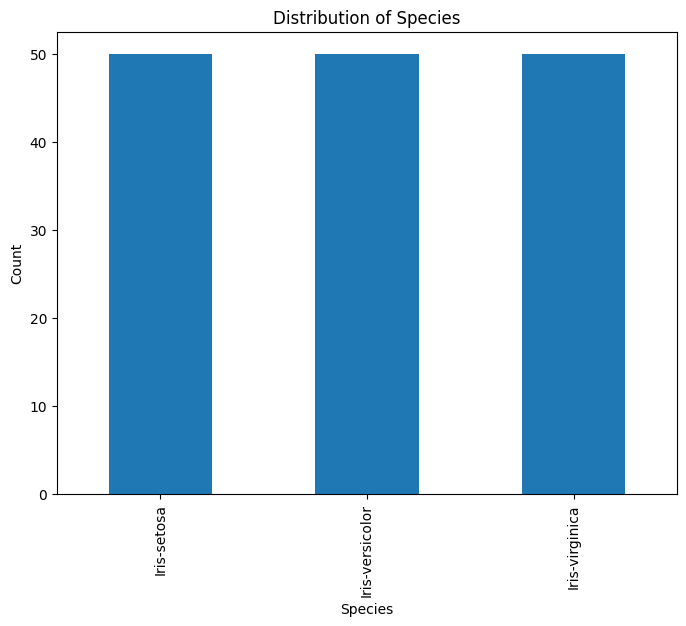


Descriptive Statistics:
        SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


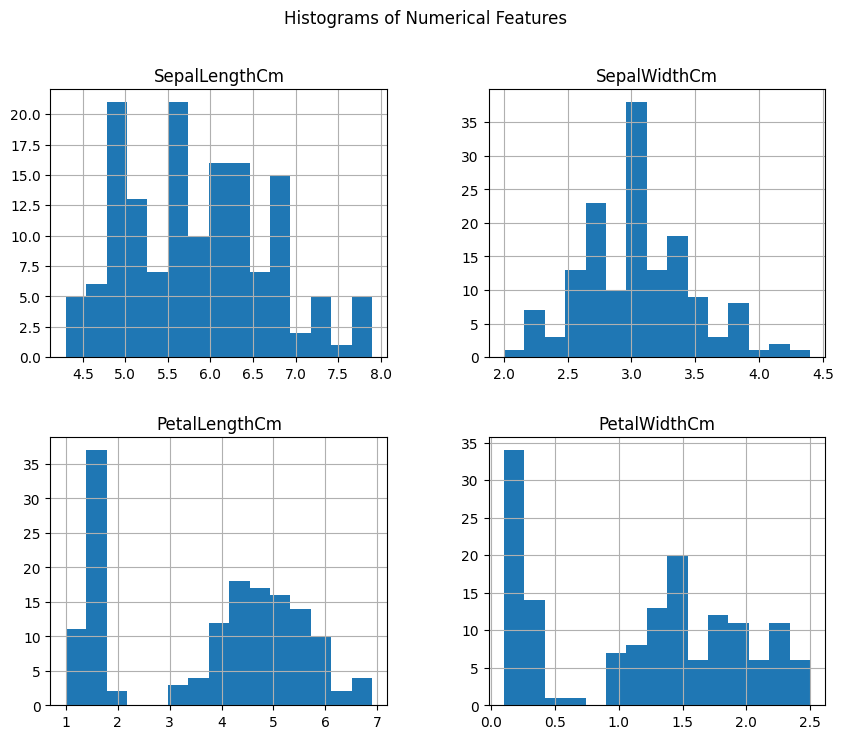

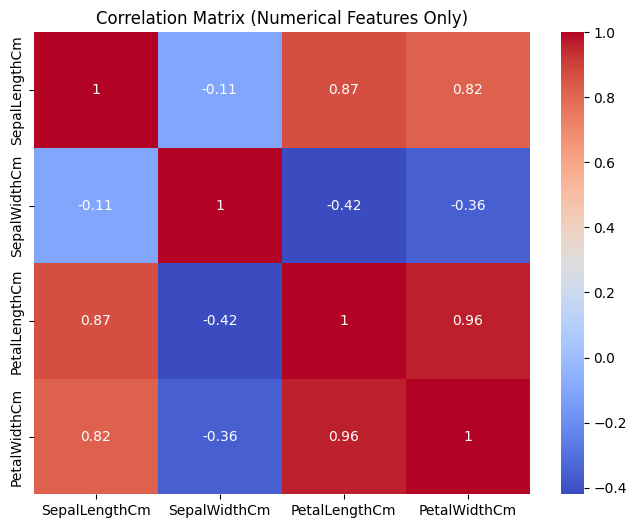

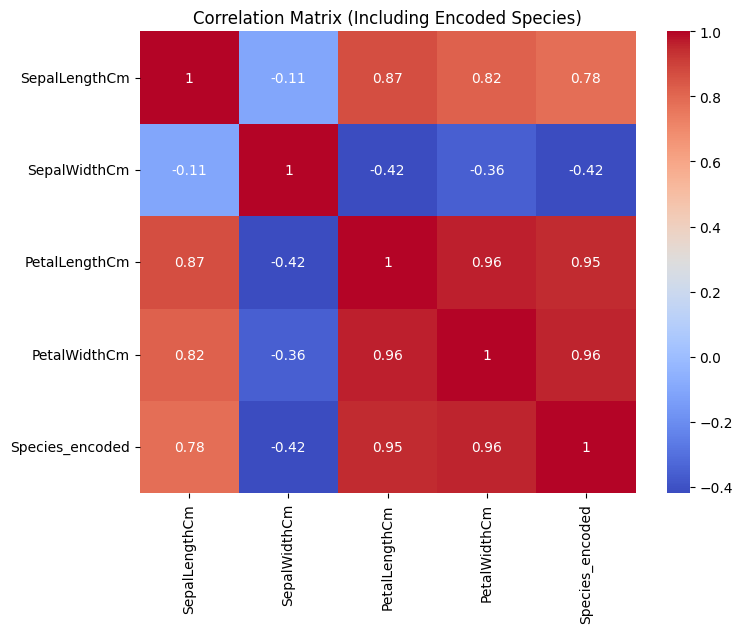

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df_iris = pd.read_csv("Iris.csv")

# Check the shape of the DataFrame
print("Shape of the DataFrame:", df_iris.shape)

# Examine data types and identify the target variable
print("\nData Types:\n", df_iris.dtypes)
target_variable = 'Species'
print(f"\nTarget variable: {target_variable}")

# Check for missing values
print("\nMissing Values:\n", df_iris.isnull().sum())

# Analyze the distribution of the target variable
print("\nTarget Variable Distribution:\n", df_iris['Species'].value_counts())
df_iris['Species'].value_counts().plot(kind='bar', figsize=(8, 6))
plt.title('Distribution of Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

# Calculate descriptive statistics for numerical features
numerical_features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
print("\nDescriptive Statistics:\n", df_iris[numerical_features].describe())

# Visualize distributions of numerical features
df_iris[numerical_features].hist(figsize=(10, 8), bins=15)
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Examine correlations between numerical features only (excluding categorical target variable)
correlation_matrix = df_iris[numerical_features].corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numerical Features Only)')
plt.show()

# Encode the Species column into numerical format for correlation analysis
label_encoder = LabelEncoder()
df_iris["Species_encoded"] = label_encoder.fit_transform(df_iris["Species"])

# Compute correlation including encoded species
correlation_matrix_encoded = df_iris[numerical_features + ["Species_encoded"]].corr()

# Visualize the updated correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_encoded, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Including Encoded Species)')
plt.show()


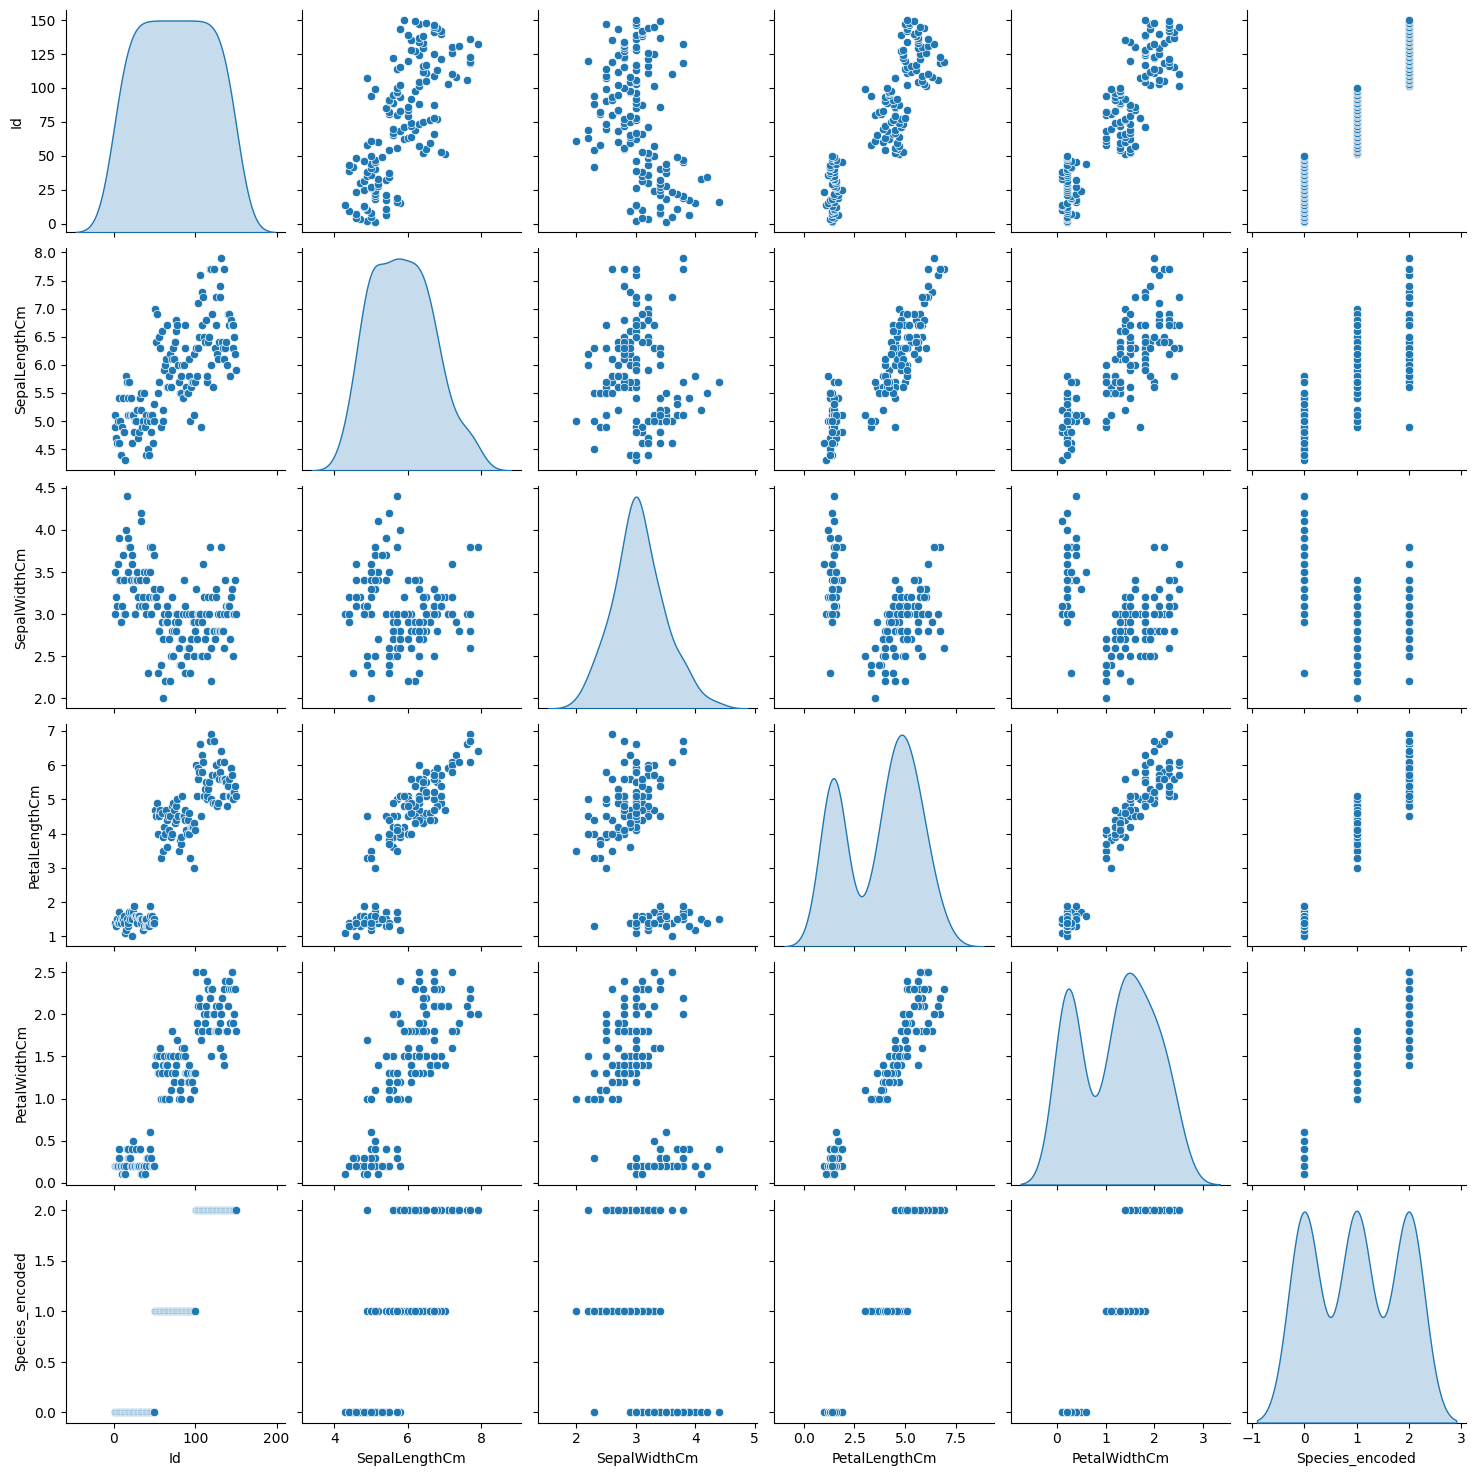

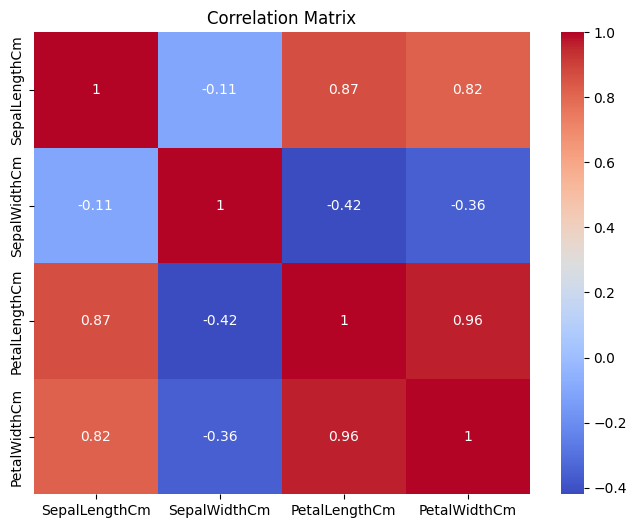

In [3]:
# Examine correlations between numerical features and the target variable
import seaborn as sns
sns.pairplot(df_iris.drop('Species', axis=1), diag_kind='kde') # Exclude 'Species' from pairplot
plt.show()

correlation_matrix = df_iris[numerical_features].corr() # Exclude 'Species' from correlation calculation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Separate features (X) and target variable (y)
X = df_iris.drop(['Id', 'Species'], axis=1)
y = df_iris['Species']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier with k=3
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
results = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({'k': k, 'accuracy': accuracy})

best_k = max(results, key=lambda x: x['accuracy'])
print(f"Best k: {best_k['k']}, Best accuracy: {best_k['accuracy']}")

Best k: 1, Best accuracy: 1.0


Accuracy of the best KNN model (k=1): 1.0


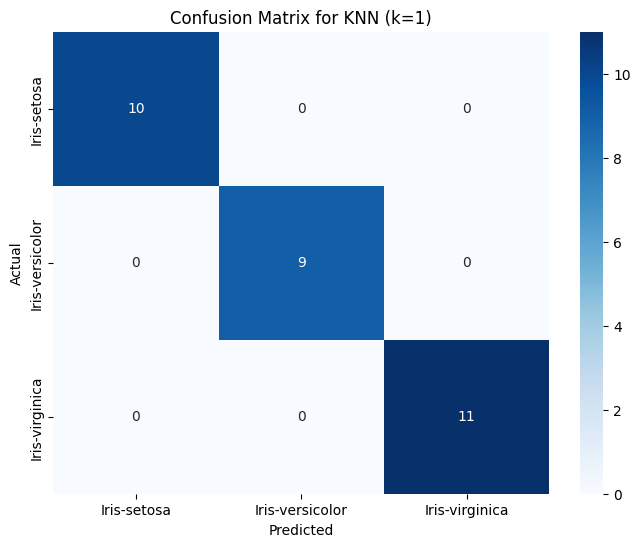

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Use the best K value (k=1)
best_k = 1
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)

# Train the model
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test_scaled)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the best KNN model (k={best_k}): {accuracy}")

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=knn_classifier.classes_, yticklabels=knn_classifier.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix for KNN (k={best_k})")
plt.show()

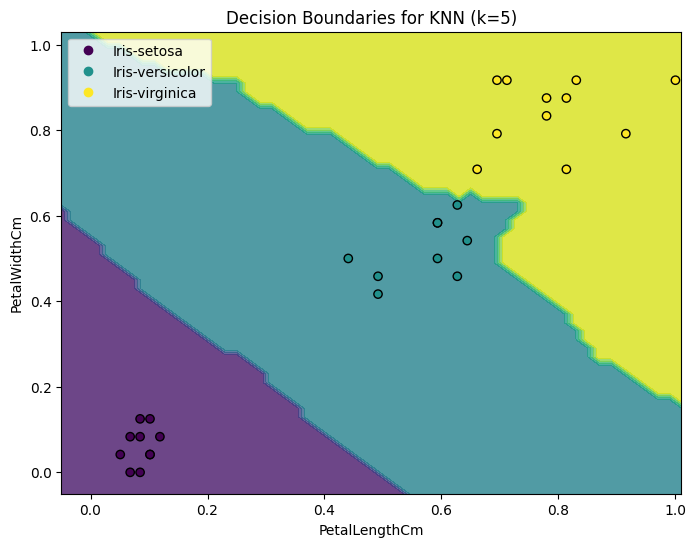

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load dataset
df_iris = pd.read_csv("Iris.csv")

# Select only two features for visualization
feature1 = 'PetalLengthCm'
feature2 = 'PetalWidthCm'
X = df_iris[[feature1, feature2]]
y = df_iris["Species"]

# Normalize the two selected features
scaler_2features = MinMaxScaler()
X_scaled = scaler_2features.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Encode the species labels numerically for training
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train KNN using only the selected two features
best_k = 5  # Choose the number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(X_train, y_train_encoded)

# Create a meshgrid for visualization
x_min, x_max = X_train[:, 0].min() - 0.05, X_train[:, 0].max() + 0.05
y_min, y_max = X_train[:, 1].min() - 0.05, X_train[:, 1].max() + 0.05
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict on the meshgrid using the trained KNN model
Z = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.8)

# Plot the test data points
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_encoded, edgecolors='k', cmap='viridis')

# Fix legend error by ensuring correct format
handles, _ = scatter.legend_elements()
plt.legend(handles=handles, labels=list(label_encoder.classes_))

# Add labels and title
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f"Decision Boundaries for KNN (k={best_k})")
plt.show()


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load dataset
df_iris = pd.read_csv("Iris.csv")

# Select only two features for visualization
feature1 = 'PetalLengthCm'
feature2 = 'PetalWidthCm'
X = df_iris[[feature1, feature2]]
y = df_iris["Species"]

# Normalize the two selected features
scaler_2features = MinMaxScaler()
X_scaled = scaler_2features.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Encode species labels for training
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Update feature indices
feature1_index = 0  # Correct index after selecting only two features
feature2_index = 1  # Correct index after selecting only two features

# Select the two features using correct indices
X_train_2features = X_train[:, [feature1_index, feature2_index]]
X_test_2features = X_test[:, [feature1_index, feature2_index]]

# Train KNN classifier using only the selected features
best_k = 5
knn_classifier_2features = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier_2features.fit(X_train_2features, y_train_encoded)

# Create a meshgrid for visualization
x_min, x_max = X_train_2features[:, 0].min() - 0.05, X_train_2features[:, 0].max() + 0

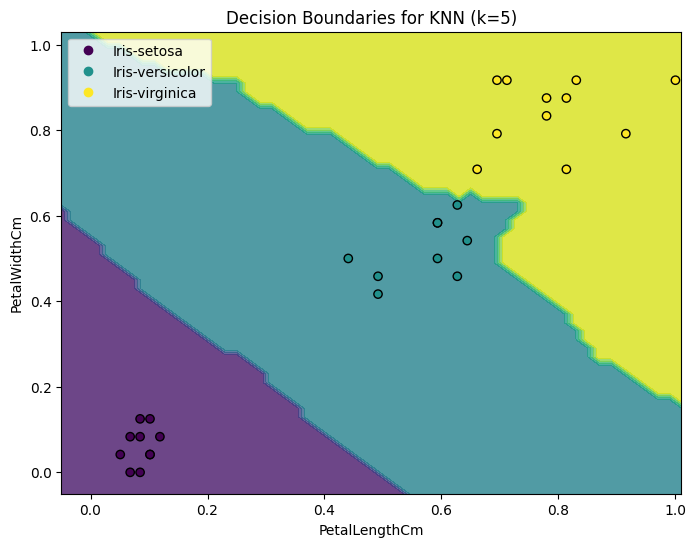

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load dataset
df_iris = pd.read_csv("Iris.csv")

# Select only two features for visualization
feature1 = 'PetalLengthCm'
feature2 = 'PetalWidthCm'
X = df_iris[[feature1, feature2]]
y = df_iris["Species"]

# Encode the species labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Convert species names into numbers

# Normalize the selected features
scaler_2features = MinMaxScaler()
X_scaled = scaler_2features.fit_transform(X)

# Split the data into training and testing sets
X_train_scaled_2features, X_test_scaled_2features, y_train_encoded, y_test_encoded = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42
)

# Train KNN classifier using only the two selected features
best_k = 5
knn_classifier_2features = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier_2features.fit(X_train_scaled_2features, y_train_encoded)

# Create a meshgrid for visualization
x_min, x_max = X_train_scaled_2features[:, 0].min() - 0.05, X_train_scaled_2features[:, 0].max() + 0.05
y_min, y_max = X_train_scaled_2features[:, 1].min() - 0.05, X_train_scaled_2features[:, 1].max() + 0.05
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict on the meshgrid
Z = knn_classifier_2features.predict(np.c_[xx.ravel(), yy.ravel()])

# Ensure Z is reshaped correctly and converted to numeric values
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.8)

# Plot the test data points
scatter = plt.scatter(X_test_scaled_2features[:, 0], X_test_scaled_2features[:, 1], c=y_test_encoded, edgecolors='k', cmap='viridis')

# Fix legend formatting
handles, _ = scatter.legend_elements()
plt.legend(handles=handles, labels=list(label_encoder.classes_))

# Add labels and title
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f"Decision Boundaries for KNN (k={best_k})")
plt.show()
